### MEC 2403 - Otimização e Algoritmos para Engenharia Mecanica
#### Aluno: Felipe da Costa Pereira (Mestrado)

#### Lista 2: 

1 – Implementar, usando o MATLAB, os seguintes métodos para cálculo do ponto de mínimo de funções de uma única variável:  
- Passo Constante (com ∆α = 0.01)  
- Bisseção  
- Seção Áurea   


2 – Utilizando os métodos implementados na questão anterior, testar a sua implementação encontrando o ponto de mínimo das seguintes funções:  
- (a) $f(x_{1}, x_{2}) = x_{1}^2 − 3 x_{1}x_{2} + 4 x_{2}^2 + x_{1} - x_{2}$  
    
    Ponto Inicial: $x^0 = \{2,2\}^t$  
    Direção: $d = \{-1,-1\}^t$  

    
- (b) Função de McCormick: 

    $f(x_{1}, x_{2}) = sin (x_{1} + x_{2}) + (x_{1} - x_{2})^2 − 1.5x_{1} + 2.5x_{2}$  
    
    Ponto Inicial: $x^0 = \{-2,3\}^t$  
    Direção: $d = \{1.453,-4.547\}^t$

- (c) Função de Himmelblau: 

    $f(x_{1}, x_{2}) = (x_{1}^2 + x_{2} - 11)^2 + (x_{1} + x_{2}^2 − 7)^2$  
    
    Ponto Inicial: $x^0 = \{0,5\}^t$  
    Direção: $d = \{3,1.5\}^t$   

Para cada função acima, utilize o MATLAB para desenhar (na mesma figura): as curvas de nível e o segmento de reta conectando o ponto inicial ao ponto de mínimo.  
Adotar uma tolerância de $10^{−5}$ para verificação da convergência numérica.

___
#### Solução:

Setando parâmetros globais

In [136]:
TOL = 10^-5
epsilon = 10^-8

TOL = 1.0000e-05
epsilon = 1.0000e-08


Implementando o algoritmo do passo constante

In [137]:
function [alpha_L, alpha_H, f_L, f_H, ciclos, f_eval] = passo_constante(f, x0, d, a)
    % inicialização
    alpha = 0;
    f_min = Inf;
    f_val = f(x0);
    alphas = [];
    fs = [];
    ciclos=0; % contador
    f_eval=0; % numero de avaliações da função f

    % andar para +d ou -d (sentido)
    if f(x0 + a*d) < f(x0 - a*d)
        a=a; % desce a dir (d+)
    else 
        a=-a; % desce a esq (d-)
    end
    f_eval += 2;

    % looping
    while f_val <= f_min
        x = x0 + alpha * d;
        f_val = f(x);
        f_eval++;
        fs = [fs;f_val];
        if f_val < f_min
            f_min = f_val;
        end
        % salva alpha
        alphas = [alphas; alpha];
        % atualiza alpha
        alpha += a;

        ciclos++;
    end

    % plot (alphas(end-1:end), fs(end-1:end), 'o-'), xlabel('\alpha'), ylabel('f')
    f_L = fs(end-1);
    f_H = fs(end);
    alpha_L = alphas(end-1);
    alpha_H = alphas(end);   
end

% testando
% [alpha_L, alpha_H, ~, ~, ciclos, f_eval] = passo_constante(@fa, [2 2], [-1 -1], 0.0099)


Implementando o algoritmo da bisseção

In [138]:
function [alpha_k, ciclos, f_eval] = bissecao(f, x0, d, a, TOL, epsilon)

    [alpha_L, alpha_H, f_L, f_H] = passo_constante(f, x0, d, a);
    b = norm(alpha_L-alpha_H); %tamanho do intervalo
    ciclos=0; %contador
    f_eval=0; %quantas x f foi avaliada

    while b > TOL
        alpha_M = (alpha_L+alpha_H)/2;

        f1 = f(x0 + (alpha_M - epsilon) * d);
        f2 = f(x0 + (alpha_M + epsilon) * d);
        f_eval += 2;

        %  Se 𝑓1 > 𝑓2 ⟹ descartar a metade da esquerda, ou seja, fazer: 𝛼𝐿 = 𝛼𝑀 ; caso contrário, fazer: 𝛼𝑈 = 𝛼𝑀 ;
        if f1 > f2
            % fprintf('f1 > f2, descarta esq, desce pra dir\n')
            alpha_L = alpha_M;
        else 
            % fprintf('f1 < f2, descarta dir, desce pra esq\n')
            alpha_H = alpha_M;
        end
        b = norm(alpha_L-alpha_H);

        ciclos++;
    end
    alpha_k = (alpha_L+alpha_H)/2;
end

% [alpha_k, ciclos, f_eval] = bissecao(@fa, [2 2], [-1 -1], 0.0099, TOL, epsilon)

    

Implementando o algoritmo da Seção Áurea

In [139]:
function [alpha_k, ciclos, f_eval] = secao_aurea (f, x0, d, a, TOL)
    ra = (sqrt(5)-1)/2;
    ciclos=0;
    f_eval=0; %quantas x f foi avaliada

    [alpha_L, alpha_H, ~, ~] = passo_constante(f, x0, d, a);
    b = norm(alpha_L-alpha_H); %tamanho do intervalo
    alpha_E = alpha_L + (1-ra)*b;
    alpha_D = alpha_L + ra*b;
    f1 = f(x0 + alpha_E * d);
    f2 = f(x0 + alpha_D * d);
    f_eval += 2;

    while b > TOL
        %  Se 𝑓1 > 𝑓2, descarta o intervalo: [𝛼𝐿,𝛼𝐸] Se 𝑓2 > 𝑓1, descarta o intervalo: [𝛼𝐷, 𝛼𝑈]
        if f1 > f2
            % fprintf('f1 > f2, descarta [L-E], desce pra dir\n')
            alpha_L = alpha_E;
            alpha_E = alpha_D;
            b = norm(alpha_L-alpha_H);
            alpha_D = alpha_L + ra*b;
            
            % avaliar menos vezes a funcao f
            f1 = f2;
            f2 = f(x0 + alpha_D * d);
            f_eval++;
        else
            % fprintf('f1 < f2, descarta [D-U], desce pra esq\n')
            alpha_H = alpha_D;
            alpha_D = alpha_E;
            b = norm(alpha_L-alpha_H);
            alpha_E = alpha_L + (1-ra)*b;
            
            % avaliar menos vezes a funcao f
            f2 = f1;
            f1 = f(x0 + alpha_E * d);
            f_eval++;
        end

        ciclos++;        
    end

    alpha_k = (alpha_L+alpha_H)/2;
end

% [alpha_k, ciclos, f_eval] = secao_aurea(@fa, [2 2], [-1 -1], 0.0099, TOL)



Função que avalia $f$ no ponto $x$

> Item a: $f_{a}(x_{1}, x_{2}) = x_{1}^2 − 3 x_{1}x_{2} + 4 x_{2}^2 + x_{1} - x_{2}$  
>
> Item b: $f_{b}(x_{1}, x_{2}) = sin (x_{1} + x_{2}) + (x_{1} - x_{2})^2 − 1.5x_{1} + 2.5x_{2}$    
>
> Item c: $f_{c}(x_{1}, x_{2}) = (x_{1}^2 + x_{2} - 11)^2 + (x_{1} + x_{2}^2 − 7)^2$  
>


In [140]:
function f = fa(x)
    f = x(1)^2 - 3*x(1)*x(2) + 4*x(2)^2 +x(1)-x(2);
end
function f = fb(x)
    f = sin(x(1) + x(2)) + (x(1) - x(2))^2 - 1.5*x(1) + 2.5*x(2);
end
function f = fc(x)
    f = (x(1)^2 + x(2) - 11)^2 + (x(1) + x(2)^2 - 7)^2;
end

2 – Utilizando os métodos implementados na questão anterior, testar a sua implementação encontrando o ponto de mínimo das seguintes funções:  
- (a) $f(x_{1}, x_{2}) = x_{1}^2 − 3 x_{1}x_{2} + 4 x_{2}^2 + x_{1} - x_{2}$  
    
    Ponto Inicial: $x^0 = \{2,2\}^t$  
    Direção: $d = \{-1,-1\}^t$  

alpha_k = 2.0000
f(P1=x0) = 8.000000e+00
f(P2)=fmin = 4.703369e-14


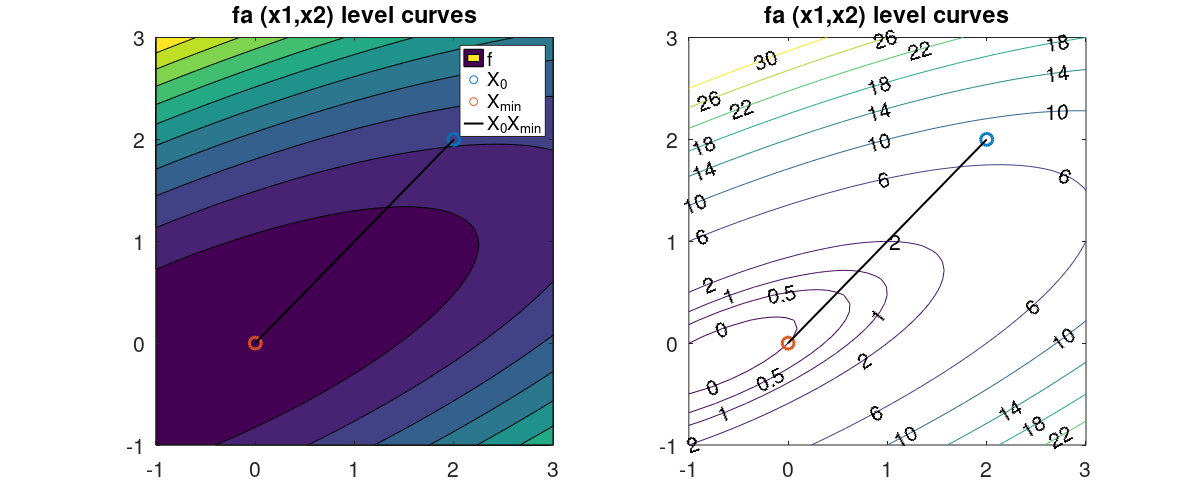

In [141]:
x0 = [2 2];
d= [-1 -1];
d_alpha = 0.0099;

[alpha_L, ~, ~, ~, ciclos, f_eval] = passo_constante(@fa, x0, d, d_alpha);
[alpha_k, ciclos, f_eval] = bissecao(@fa, x0, d, d_alpha, TOL, epsilon);
[alpha_k, ciclos, f_eval] = secao_aurea(@fa, x0, d, d_alpha, TOL);

x1 = linspace(-1,3,50);
x2 = linspace(-1,3,50);
[x1,x2] = meshgrid(x1,x2);
fa_plot = x1.^2 - 3*x1.*x2 + 4*x2.^2 + x1 - x2;

alpha_k
P1 = x0;
P2 = x0 + alpha_k * d;
fprintf ('f(P1=x0) = %e\n', fa(P1))
fprintf ('f(P2)=fmin = %e\n', fa(P2))

set(gcf,'Position',[0 0 1200 500])
subplot (121)
contourf(x1, x2, fa_plot), title('fa (x1,x2) level curves')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');


subplot (122)
contour(x1, x2, fa_plot, 'ShowText','on', [0:0.5:1 2:4:30]), title('fa (x1,x2) level curves')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)

(b) Função de McCormick: 

$f(x_{1}, x_{2}) = sin (x_{1} + x_{2}) + (x_{1} - x_{2})^2 − 1.5x_{1} + 2.5x_{2}$  

Ponto Inicial: $x^0 = \{-2,3\}^t$  
Direção: $d = \{1.453,-4.547\}^t$


alpha_k = 1.0000
P2 =

  -0.5470  -1.5471

f(P1=x0) = 3.634147e+01
f(P2)=fmin = -2.913223e+00


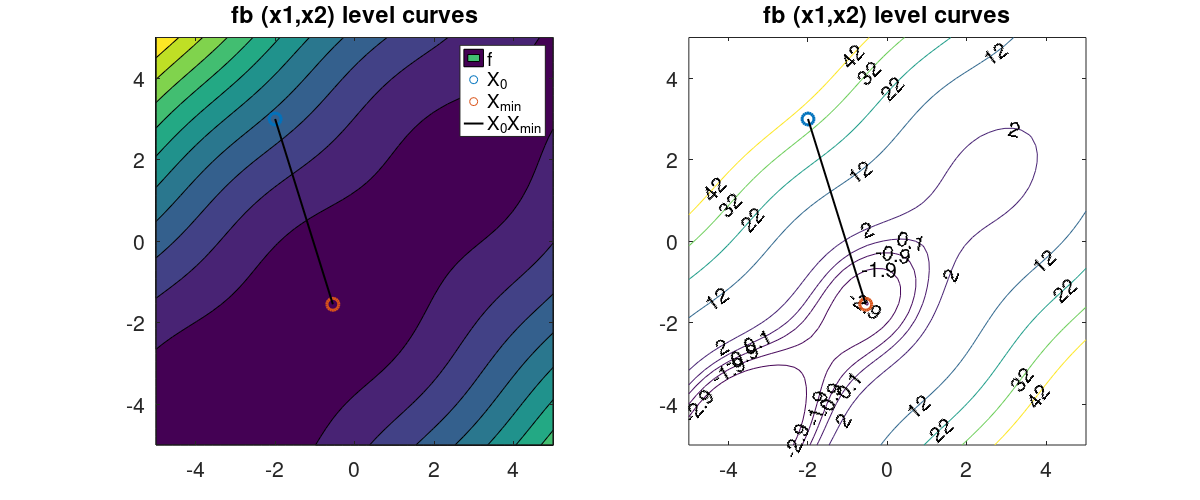

In [155]:
x0 = [-2 3];
d= [1.453 -4.547];
d_alpha = 0.0099;

[alpha_L, ~, ~, ~, ciclos, f_eval] = passo_constante(@fb, x0, d, d_alpha);
[alpha_k, ciclos, f_eval] = bissecao(@fb, x0, d, d_alpha, TOL, epsilon);
[alpha_k, ciclos, f_eval] = secao_aurea(@fb, x0, d, d_alpha, TOL);

x1 = linspace(-5, 5, 50);
x2 = linspace(-5, 5, 50);
[x1,x2] = meshgrid(x1,x2);
fb_plot = sin (x1+x2) + (x1-x2).^2 -1.5*x1 + 2.5*x2;

alpha_k
P1 = x0;
P2 = x0 + alpha_k * d
fprintf ('f(P1=x0) = %e\n', fb(P1))
fprintf ('f(P2)=fmin = %e\n', fb(P2))

set(gcf,'Position',[0 0 1200 500])
subplot (121)
contourf(x1, x2, fb_plot), title('fb (x1,x2) level curves')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');


subplot (122)
contour(x1, x2, fb_plot, 'ShowText','on', [-4:1:1 2:10:48]), title('fb (x1,x2) level curves')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)


- (c) Função de Himmelblau: 

    $f(x_{1}, x_{2}) = (x_{1}^2 + x_{2} - 11)^2 + (x_{1} + x_{2}^2 − 7)^2$  
    
    Ponto Inicial: $x^0 = \{0,5\}^t$  
    Direção: $d = \{3,1.5\}^t$   

alpha_k = -1.0098
P2 =

  -3.0294   3.4853

f(P1=x0) = 3.600000e+02
f(P2)=fmin = 7.249694e+00


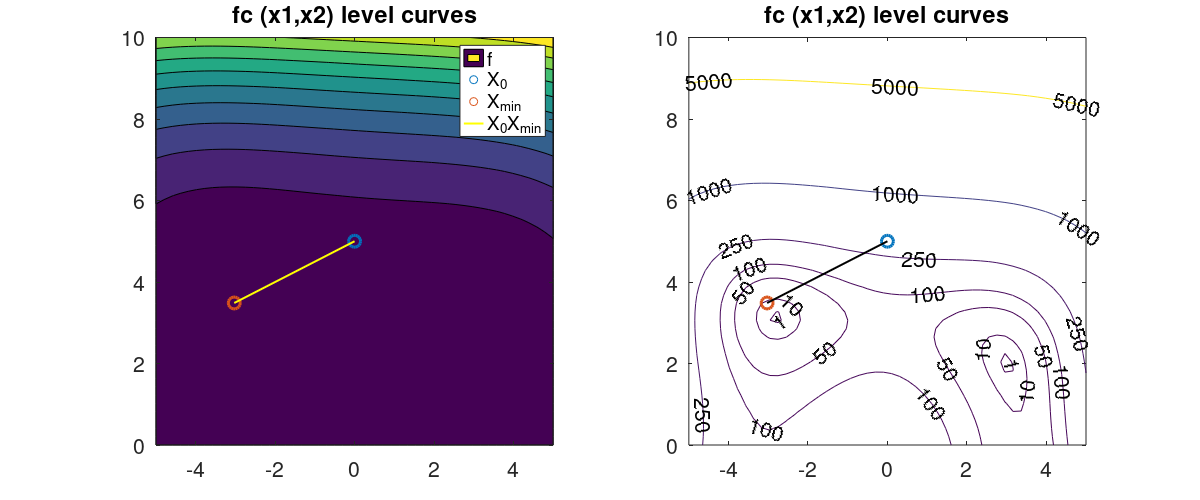

In [143]:
x0 = [0 5];
d= [3 1.5];
d_alpha = 0.0099;

[alpha_L, ~, ~, ~, ciclos, f_eval] = passo_constante(@fc, x0, d, d_alpha);
[alpha_k, ciclos, f_eval] = bissecao(@fc, x0, d, d_alpha, TOL, epsilon);
[alpha_k, ciclos, f_eval] = secao_aurea(@fc, x0, d, d_alpha, TOL);

x1 = linspace(-5, 5,50);
x2 = linspace(0, 10,50);
[x1,x2] = meshgrid(x1,x2);
fc_plot = (x1.^2 + x2 - 11).^2 + (x1 + x2.^2 - 7).^2;

alpha_k
P1 = x0;
P2 = x0 + alpha_k * d
fprintf ('f(P1=x0) = %e\n', fc(P1))
fprintf ('f(P2)=fmin = %e\n', fc(P2))

set(gcf,'Position',[0 0 1200 500])
subplot (121)
contourf(x1, x2, fc_plot), title('fc (x1,x2) level curves')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'y-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');


subplot (122)
contour(x1, x2, fc_plot, 'ShowText','on', [1 10 50 100 250 1E3 5e3]), title('fc (x1,x2) level curves')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)

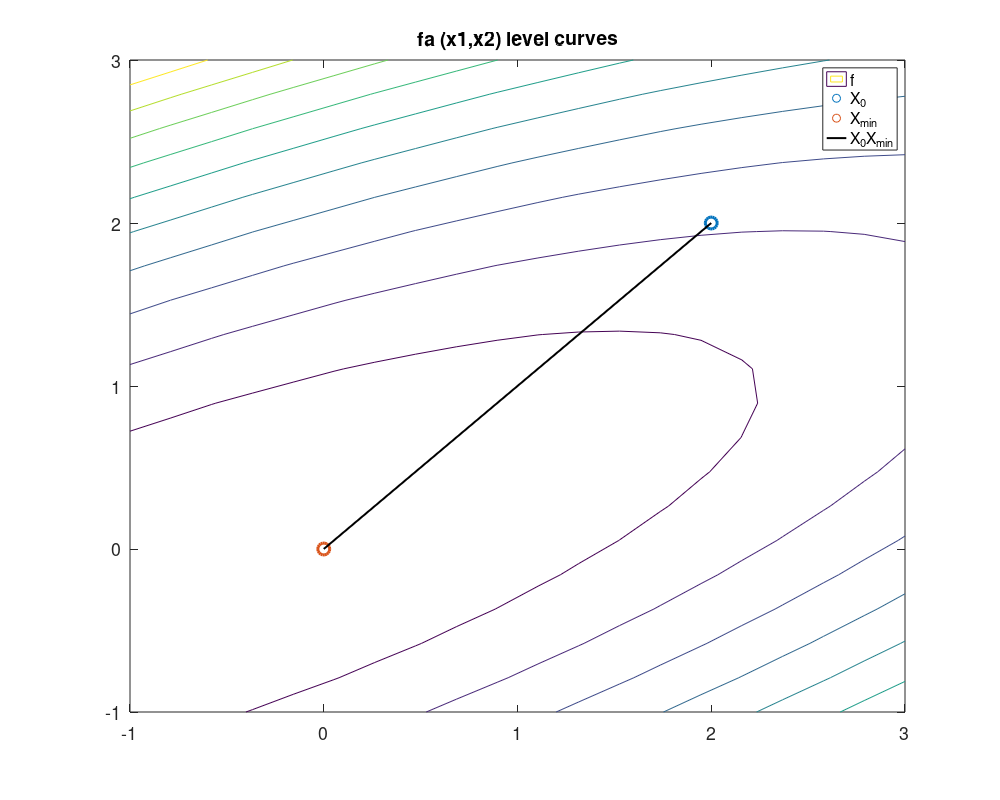

In [144]:
x1 = linspace(-1, 3,20);
x2 = linspace(-1, 3,20);
[x1,x2] = meshgrid(x1,x2);

fa = x1.^2 - 3*x1.*x2 + 4*x2.^2 + x1 - x2;

P1 = [2 2];
P2 = P1 + 2.000 * [-1 -1];

set(gcf,'Position',[0 0 1000 800])
contour(x1,x2,fa);
title('fa (x1,x2) level curves');
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'X_0', 'X_{min}', 'X_0X_{min}');

error: 'f' undefined near line 1, column 13
error: 'f_val' undefined near line 1, column 11
error: fs(-1): subscripts must be either integers 1 to (2^63)-1 or logicals
error: fs(0): subscripts must be either integers 1 to (2^63)-1 or logicals
error: parse error:

  syntax error

>>> end
      ^
error: 'a' undefined near line 12, column 15
error: called from
    passo_constante at line 12 column 20


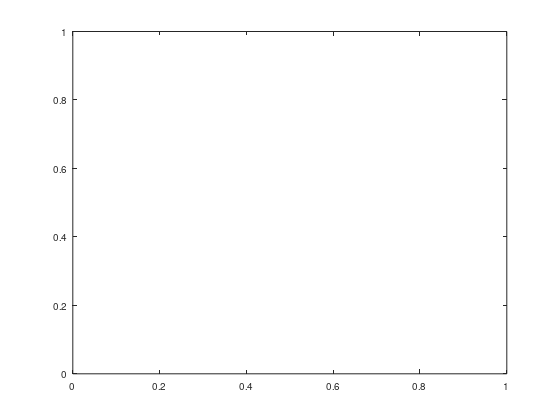

In [145]:

    % alpha_max = norm(d);
    alphas = [];
    fs = [];

    f_min = Inf;
    f_val = f(x0);

    while f_val <= f_min
        % calcula x
        x = x0 + alpha * d;

        % calcula f(x), utilizando a funcao f definida anteiormente
        f_val = f_func(x);
        fs(end+1) = f_val;
        if f_val < f_min
            f_min = f_val;
        end
        % salva alpha
        alphas (end+1) = alpha;
        % atualiza alpha
        alpha += 0.05;
    end
    plot (alphas, fs, '-o')
    alpha_L = fs(end-1)
    alpha_H = fs(end)
end

% fa = @fa;
passo_constante(@fa, [1 1])

Dados do problema

In [146]:
x1 = linspace(-2,4,50);
x2 = linspace(-2,2,50);
[x1,x2] = meshgrid(x1,x2);

f = x1.^3 + 2.*x1.*x2.^2 - x2.^3 -20.*x1;

P1 = [-0.7 1.6];
P2 = [3.7 -0.4];

Plotando $f$, $P_{1}$, $P_{2}$ e o segmento $P_{1}P_{2}$

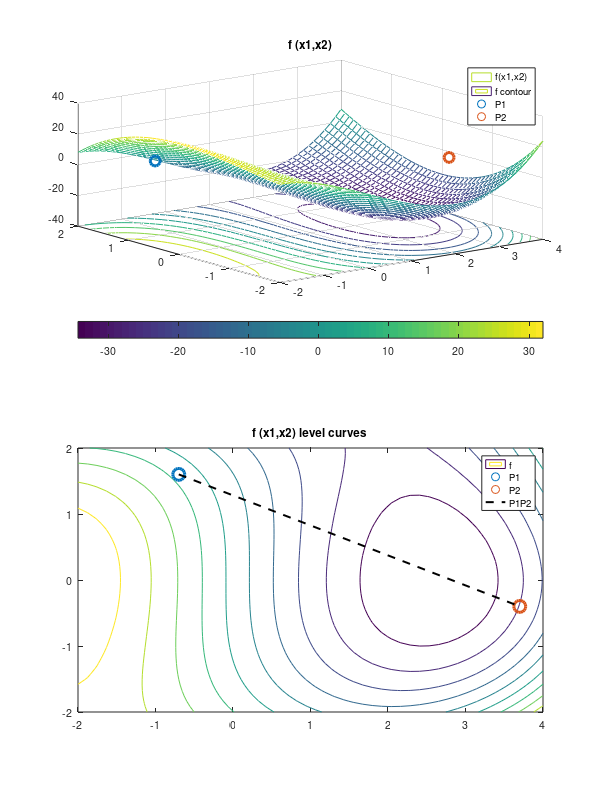

In [147]:
set(gcf,'Position',[0 0 600 800])

% mesh with contours
subplot(2,1,1), meshc(x1,x2,f), title('f (x1,x2)');
hold on
plot3(P1(1), P1(2), 'o', 'LineWidth', 3, 'MarkerSize', 10);
plot3(P2(1), P2(2), 'o', 'LineWidth', 3, 'MarkerSize', 10);
legend('f(x1,x2)', 'f contour', 'P1', 'P2');
colorbar('southoutside')

subplot(2,1,2);
contour(x1,x2,f);
title('f (x1,x2) level curves');
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k--', 'LineWidth', 2)
legend('f', 'P1', 'P2', 'P1P2');

Número de divisões do segmento $ P_{1}P_{2}$

In [148]:
n = 10;

Vetor $\vec{d}$

In [149]:
d = P2-P1

d =

   4.4000  -2.0000



Cálculo de $\alpha$ e $f(\alpha)$

In [150]:
% inicialização
alpha = 0;
alpha_max = norm(d);
alphas = [];
fs = [];

while alpha <= alpha_max    % critério de parada: chegou em P2?
    % calcula x
    x = P1 + alpha * d/alpha_max;
        
    % calcula f(x), utilizando a funcao f definida anteiormente
    fs(end+1) = f_func(x);

    % salva alpha
    alphas (end+1) = alpha;

    % atualiza alpha
    alpha += alpha_max/n;
end

error: 'f_func' undefined near line 6, column 17


Valores de $f$ nos pontos:
- $\alpha = 0$ (Ponto $P_{1}$)
- $\alpha = \alpha_{max}$ (Ponto $P_{2}$) 

... e valor mínimo de $f$

In [151]:
fprintf('f(alpha=%i) = %i  (Ponto P1) \n', alphas(1), fs(1))
fprintf('f(alpha=%i) = %i  (Ponto P2) \n', alphas(end), fs(end))
fprintf('fmin = %i \n', min(fs))

error: alphas(1): out of bound 0 (dimensions are 0x0)
error: alphas(0): subscripts must be either integers 1 to (2^63)-1 or logicals
fmin =  


Plotando $f(\alpha)$

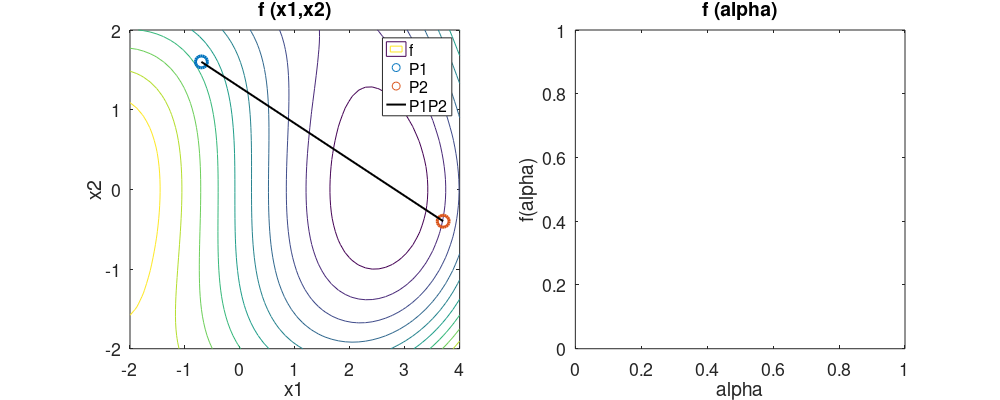

In [152]:
set(gcf,'Position',[0 0 1000 400])

subplot(1,2,1), contour(x1,x2,f), title('f (x1,x2)'), xlabel ('x1'), ylabel ('x2')
hold on
plot(P1(1),P1(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot(P2(1),P2(2),'o', 'LineWidth', 3, 'MarkerSize', 12)
plot ([P1(1);P2(1)], [P1(2);P2(2)], 'k-', 'LineWidth', 2)
legend('f', 'P1', 'P2', 'P1P2');

subplot(1,2,2), plot(alphas, fs, 'k-o'), xlabel ('alpha'), ylabel ('f(alpha)'), title('f (alpha)')

Cálculo de $\alpha$ e $f(\alpha)$ parando no minimo

error: 'f_func' undefined near line 1, column 9
error: 'f_val' undefined near line 1, column 7
error: fs(-1): subscripts must be either integers 1 to (2^63)-1 or logicals
error: fs(0): subscripts must be either integers 1 to (2^63)-1 or logicals


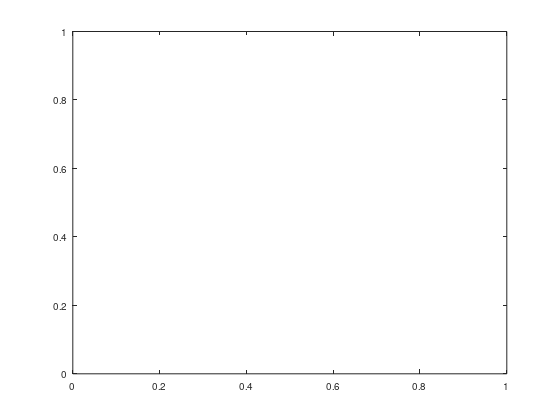

In [153]:
% inicialização
alpha = 0;

% alpha_max = norm(d);
alphas = [];
fs = [];

f_min = Inf;
f_val = f_func(P1);

while f_val <= f_min
    % calcula x
    x = P1 + alpha * d;
    % calcula f(x), utilizando a funcao f definida anteiormente
    f_val = f_func(x);
    fs(end+1) = f_val;
    if f_val < f_min
        f_min = f_val;
    end
    % salva alpha
    alphas (end+1) = alpha;
    % atualiza alpha
    alpha += 0.05;
end
plot (alphas, fs, '-o')
alpha_L = fs(end-1)
alpha_H = fs(end)